<img src="https://csshint.com/wp-content/uploads/2019/05/Animated-Logo-examples-2.gif">

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/MLTollsStackOverflow.csv")

In [3]:
data.head()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,pytorch,keras,nlp,apache-spark,hadoop,pyspark,python-3.x,tensorflow,deep-learning,neural-network,lstm,time-series,pillow,rasa,opencv,pipenv,seaborn,Dask,jupyter,AllenNLP,Theano,plotly,scikit-learn,BeautifulSoup,scrapy,Gensim,FastText,Pydot,Pybrain,...,Colab,Shogun,KNIME,Apache,Gunicorn,Pygtk,Weka,Conda,Ray,matlab.1,accord.net,regression,classification,correlation,cluster-analysis,H2o,Mallet,Numba,Tableau,Trifacta,PyArrow,Rasterio,Orange3,PyMC3,Opennn,Oryx,Istio,Venes,Plotnine,Gluon,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
0,09-Jan,0,0,0,631,8,6,2,19,8,0,0,0,8,0,1,0,4,0,0,4,0,1,0,0,3,0,0,0,0,0,0,0,0,5,0,0,0,0,0,...,0,0,0,95,0,3,0,0,0,19,0,1,2,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,0,0,5,0,0
1,09-Feb,1,0,0,633,9,7,3,27,4,0,0,0,9,0,1,0,12,0,0,4,0,2,0,0,1,0,0,0,0,0,0,0,0,4,0,0,0,0,0,...,0,0,0,114,0,7,0,0,0,27,0,3,4,0,1,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,11,0,0
2,09-Mar,0,0,0,766,4,4,2,24,3,0,0,0,12,0,1,0,4,0,0,11,0,1,0,0,7,0,0,0,0,0,0,0,0,8,0,0,0,0,0,...,0,0,0,104,0,6,0,0,0,24,0,0,0,0,4,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,2,0,0
3,09-Apr,0,0,0,768,12,6,3,32,10,0,0,0,14,0,6,0,10,0,0,6,0,0,0,0,8,0,0,0,0,0,0,0,0,3,0,0,0,0,0,...,0,0,0,111,0,3,0,0,0,32,0,0,4,0,2,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0,0,5,0,0
4,09-May,1,0,0,1003,2,7,2,42,7,0,0,0,9,0,3,0,19,0,0,7,0,0,0,0,10,0,0,0,0,0,0,0,0,14,0,0,0,0,0,...,0,0,0,127,0,5,0,0,0,42,0,2,0,0,6,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0,3,0,0


In [4]:
data.tail()

,month,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,pytorch,keras,nlp,apache-spark,hadoop,pyspark,python-3.x,tensorflow,deep-learning,neural-network,lstm,time-series,pillow,rasa,opencv,pipenv,seaborn,Dask,jupyter,AllenNLP,Theano,plotly,scikit-learn,BeautifulSoup,scrapy,Gensim,FastText,Pydot,Pybrain,...,Colab,Shogun,KNIME,Apache,Gunicorn,Pygtk,Weka,Conda,Ray,matlab.1,accord.net,regression,classification,correlation,cluster-analysis,H2o,Mallet,Numba,Tableau,Trifacta,PyArrow,Rasterio,Orange3,PyMC3,Opennn,Oryx,Istio,Venes,Plotnine,Gluon,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
127,19-Aug,57,76,24,20257,4486,1111,212,371,583,3675,253,889,237,922,216,0,6133,1332,373,191,112,141,0,19,605,31,119,66,104,0,7,137,323,322,205,30,6,2,0,...,91,2,5,388,38,2,3,91,12,325,3,60,62,22,47,24,0,23,NaN,1,20,3,2,6,0,0,56,0,4,10,0,33,0,22,144,0,0,40,16,25
128,19-Sep,54,62,16,19207,4474,1020,135,362,538,3298,260,786,207,913,207,0,5748,1217,334,211,93,156,0,25,556,24,90,73,107,1,9,139,324,330,146,30,14,2,1,...,103,0,3,435,51,5,15,103,12,362,1,76,55,35,50,39,5,25,NaN,1,25,6,5,7,0,0,65,0,4,6,0,39,0,15,147,0,4,49,28,16
129,19-Oct,73,79,27,23414,5138,1310,188,523,750,4098,300,929,272,1075,260,0,6621,1468,451,265,131,203,0,16,648,36,130,73,132,0,19,174,415,350,165,27,15,1,0,...,120,1,4,402,55,3,12,120,18,522,4,125,81,37,65,23,2,31,NaN,0,19,7,9,3,0,0,49,0,5,6,0,72,0,27,170,0,3,70,21,19
130,19-Nov,72,79,14,23602,4883,1297,199,479,918,3873,332,902,270,1007,212,0,6151,1513,482,305,129,182,0,19,659,20,133,91,131,2,12,169,412,376,176,42,10,5,1,...,108,1,9,407,56,4,15,108,19,479,4,137,103,47,67,19,2,20,NaN,0,18,12,3,17,0,0,50,0,2,8,0,58,2,14,182,0,1,73,16,19
131,19-Dec,82,72,13,20058,4150,1118,159,349,983,3519,343,834,242,767,157,0,5200,1392,500,316,137,185,0,8,546,22,112,77,98,0,4,156,439,315,140,30,9,5,0,...,125,0,3,439,61,5,13,125,12,349,4,134,99,22,46,28,5,21,NaN,1,11,7,2,7,0,0,46,0,2,3,0,56,0,13,173,0,0,56,16,18


Consist of various columns containing names of libraries and the rows having the count of questions in StackOverflow for each month from 2009 to 2019

In [5]:
data.shape

(132, 82)

In [6]:
data.describe()

,nltk,spacy,stanford-nlp,python,r,numpy,scipy,matlab,machine-learning,pandas,pytorch,keras,nlp,apache-spark,hadoop,pyspark,python-3.x,tensorflow,deep-learning,neural-network,lstm,time-series,pillow,rasa,opencv,pipenv,seaborn,Dask,jupyter,AllenNLP,Theano,plotly,scikit-learn,BeautifulSoup,scrapy,Gensim,FastText,Pydot,Pybrain,Pytil,...,Colab,Shogun,KNIME,Apache,Gunicorn,Pygtk,Weka,Conda,Ray,matlab.1,accord.net,regression,classification,correlation,cluster-analysis,H2o,Mallet,Numba,Tableau,Trifacta,PyArrow,Rasterio,Orange3,PyMC3,Opennn,Oryx,Istio,Venes,Plotnine,Gluon,Plato,Sympy,Flair,stanford-nlp.1,pyqt,Nolearn,Lasagne,OCR,Apache-spark-mlib,azure-virtual-machine
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.00000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,108.0,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.0,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,42.704545,11.848485,25.537879,9856.704545,2411.856061,514.204545,112.454545,651.681818,264.401515,980.295455,36.401515,163.924242,80.787879,414.833333,309.143939,54.022727,1478.227273,361.090909,105.424242,107.636364,26.901515,67.318182,8.484848,0.780303,401.659091,4.409091,29.371212,16.537879,30.560606,0.189394,17.909091,38.196970,124.992424,134.090909,95.295455,12.128788,1.545455,1.250000,2.310606,0.030303,...,24.371212,0.371212,1.696970,632.757576,20.484848,15.863636,20.787879,24.371212,1.189394,651.30303,2.007576,43.409091,42.454545,17.446970,33.848485,11.356061,2.128788,7.159091,0.0,0.045455,2.090909,1.000000,2.136364,3.636364,0.022727,0.068182,6.621212,0.0,0.431818,3.742424,0.128788,21.643939,0.022727,22.522727,92.386364,0.325758,1.507576,31.931818,15.560606,12.984848
std,29.024533,21.066773,22.821045,6221.071304,1714.759241,392.882978,69.680773,395.949633,249.655453,1148.018331,77.833533,274.019741,56.824227,458.009336,212.345323,101.513092,1820.009209,522.675698,145.808571,100.385917,40.629185,50.430561,10.529845,3.577526,218.717770,9.308089,37.798260,25.677508,38.005274,0.619438,25.629317,50.682282,131.165154,110.029452,70.549721,14.187084,3.148642,1.479504,2.766022,0.172073,...,34.063570,0.775634,2.192769,289.343192,15.732732,11.239769,14.911459,34.063570,3.820660,396.22921,2.394320,34.248297,26.500285,11.075945,18.366699,16.150595,2.134433,8.193117,0.0,0.242872,4.866860,2.230941,2.516428,4.506607,0.149600,0.394488,14.906083,0.0,1.113369,6.155270,0.378936,18.749507,0.194030,19.393265,47.025030,1.037438,3.185119,16.307725,19.942765,12.420732
min,0.000000,0.000000,0.000000,631.000000,2.000000,4.000000,2.000000,19.000000,2.000000,0.000000,0.000000,0.000000,8.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,95.000000,0.000000,2.000000,0.000000,0.000000,0.000000,19.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,16.750000,0.000000,5.750000,3744.250000,608.750000,119.000000,39.750000,363.500000,54.000000,1.750000,0.000000,0.000000,42.750000,0.000000,104.75

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 82 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  132 non-null    object 
 1   nltk                   132 non-null    int64  
 2   spacy                  132 non-null    int64  
 3   stanford-nlp           132 non-null    int64  
 4   python                 132 non-null    int64  
 5   r                      132 non-null    int64  
 6   numpy                  132 non-null    int64  
 7   scipy                  132 non-null    int64  
 8   matlab                 132 non-null    int64  
 9   machine-learning       132 non-null    int64  
 10  pandas                 132 non-null    int64  
 11  pytorch                132 non-null    int64  
 12  keras                  132 non-null    int64  
 13  nlp                    132 non-null    int64  
 14  apache-spark           132 non-null    int64  
 15  hadoop

In [8]:
data.isnull().sum()

month                    0
nltk                     0
spacy                    0
stanford-nlp             0
python                   0
                        ..
Nolearn                  0
Lasagne                  0
OCR                      0
Apache-spark-mlib        0
azure-virtual-machine    0
Length: 82, dtype: int64

In [9]:
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from pandas.plotting import autocorrelation_plot
from pandas.plotting import lag_plot

In [10]:
def interactive_plot(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['month'], y = df[i], name = i)
    fig.show()

In [11]:
interactive_plot(data,'Stackoverflow Questions Count over years')

In [12]:
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0]
    return x

In [13]:
interactive_plot(normalize(data),'Stackoverflow Questions Count over years')

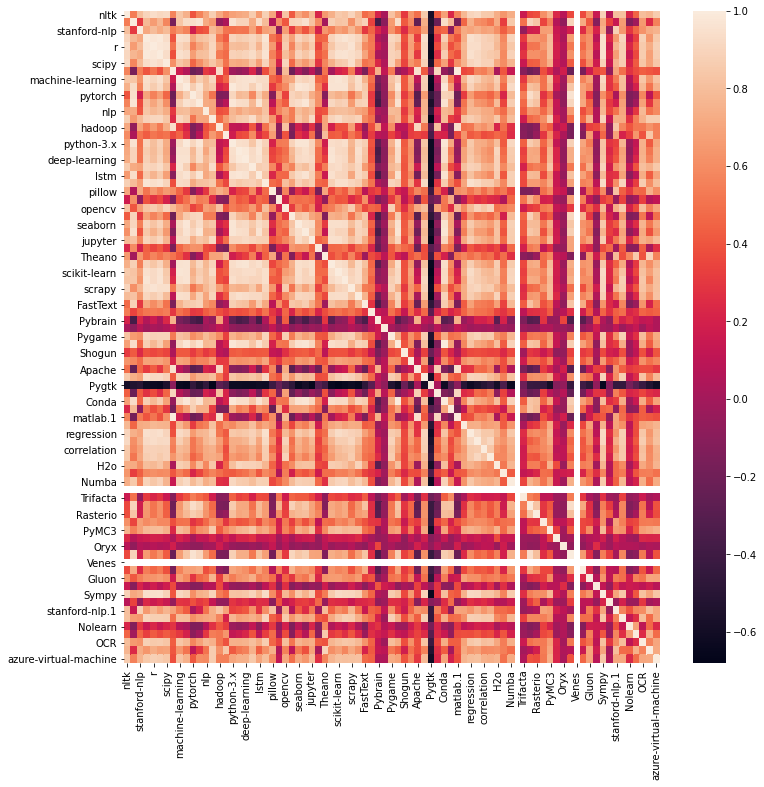

In [14]:
import seaborn as sns
correlation = data.corr()
plt.figure(figsize = (12 , 12))
sns.heatmap(correlation)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared



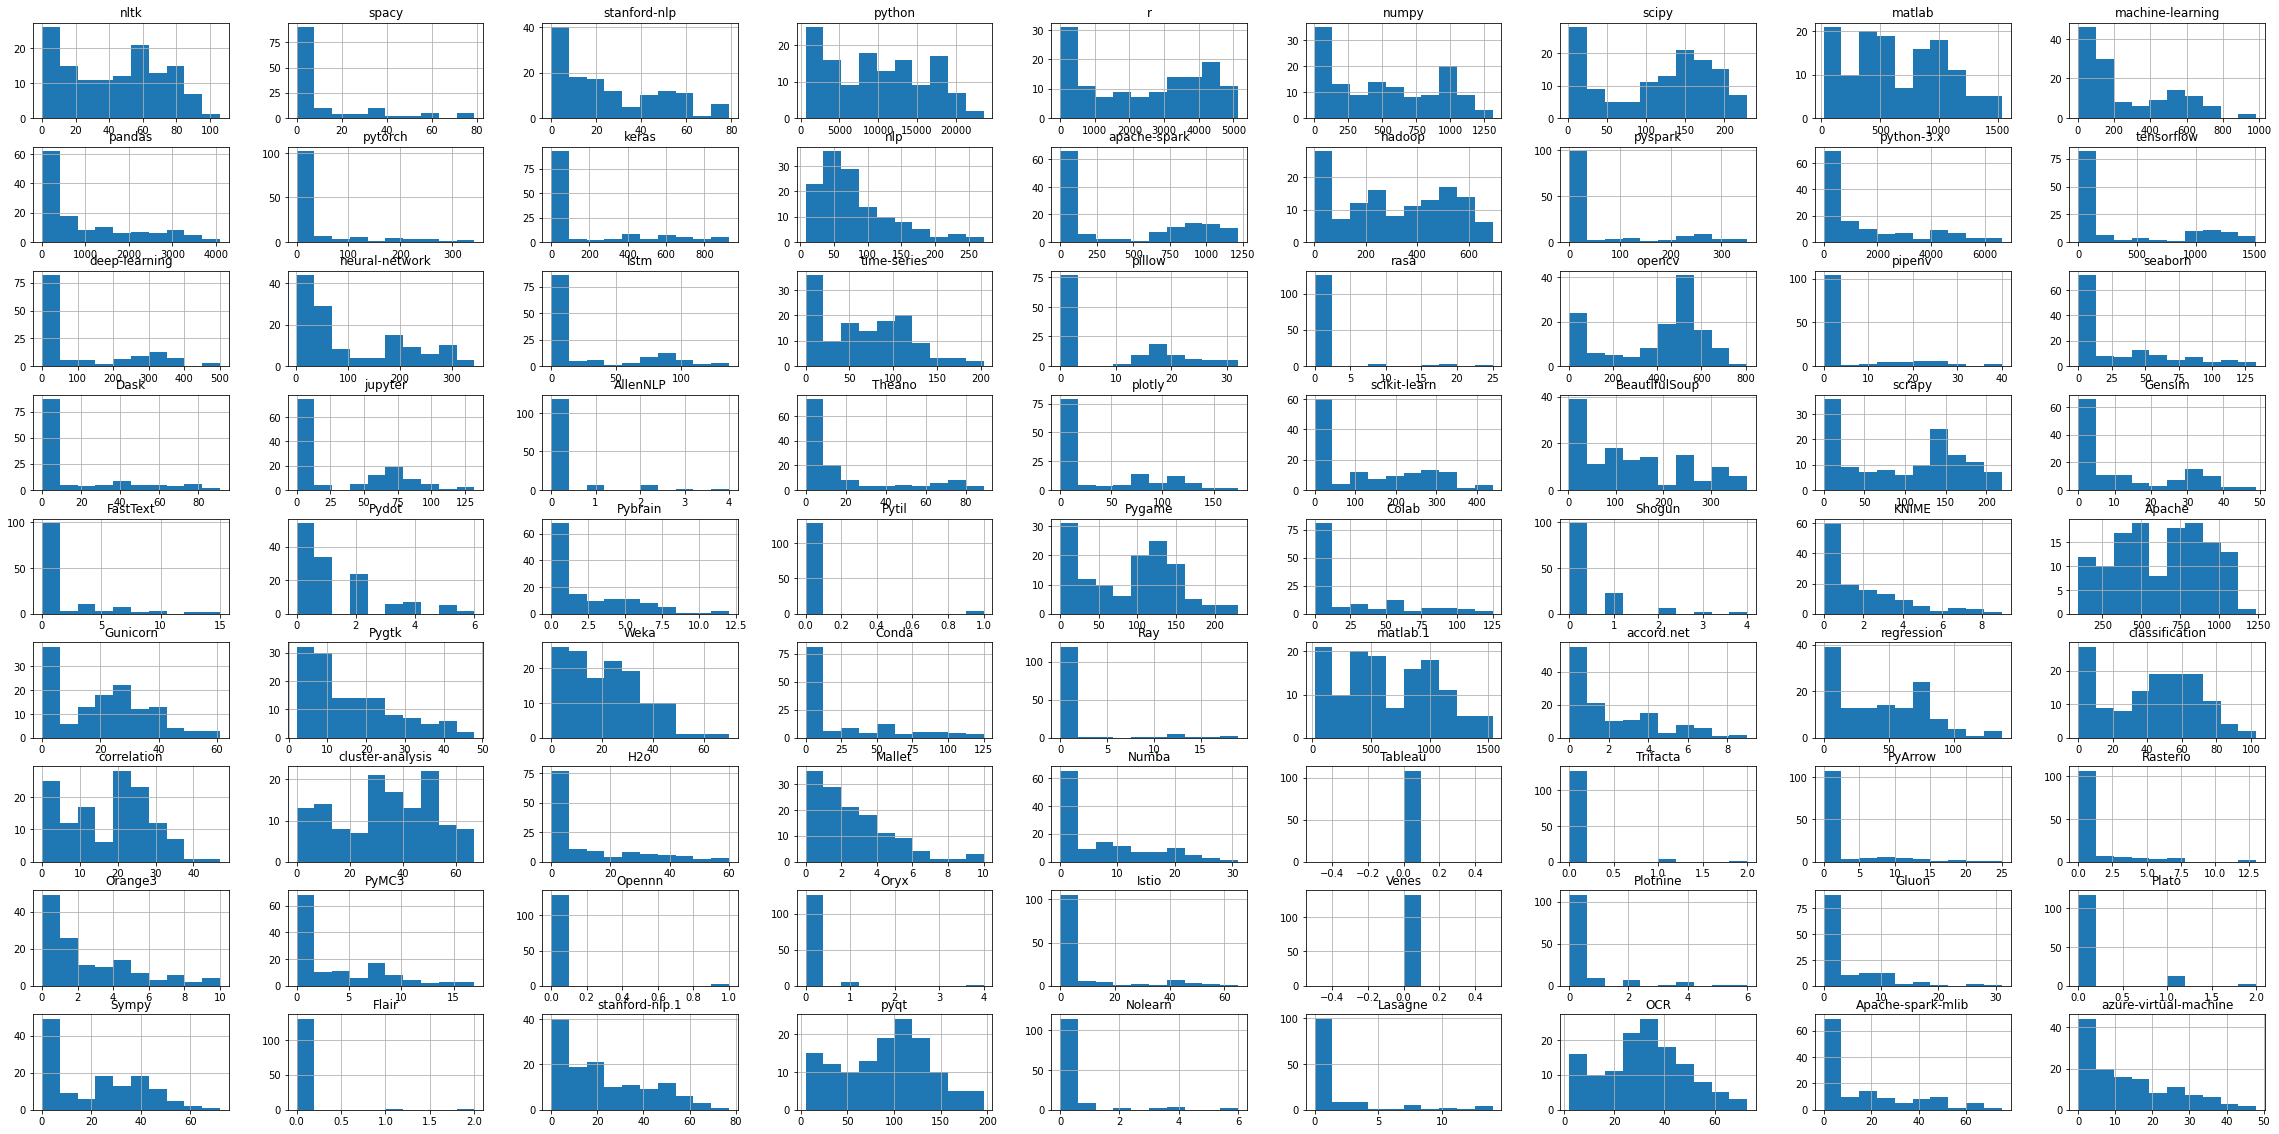

In [15]:

f = plt.figure(figsize=(40,20))
ax = plt.gca()
data.hist(ax=ax,figsize=(40,20))
plt.show()

In [16]:
tria=data.copy()

In [17]:
tria.drop('Tableau',axis=1,inplace=True)

In [18]:
for i in tria.index:
    tria.loc[i,'year']=tria['month'].str.split('-')[i][0]
    tria.loc[i,'months']=tria['month'].str.split('-')[i][1]

In [19]:
tria['year']=tria['year'].astype(int)


In [20]:
tria.drop('months',axis=1,inplace=True)
tria.drop('month',axis=1,inplace=True)

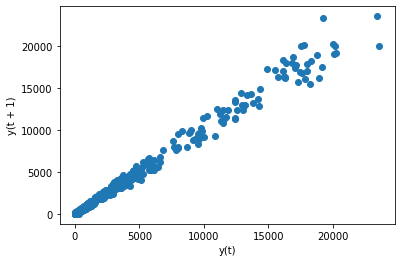

In [21]:
lag_plot(tria)
plt.show()

Current observation shows strong positive correlation with previous observations.

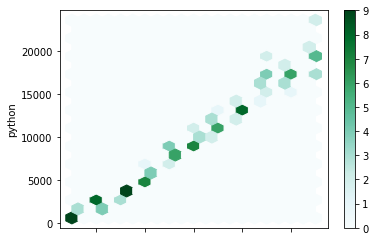

In [22]:
 tria.plot.hexbin(x='year', y='python', gridsize=20)

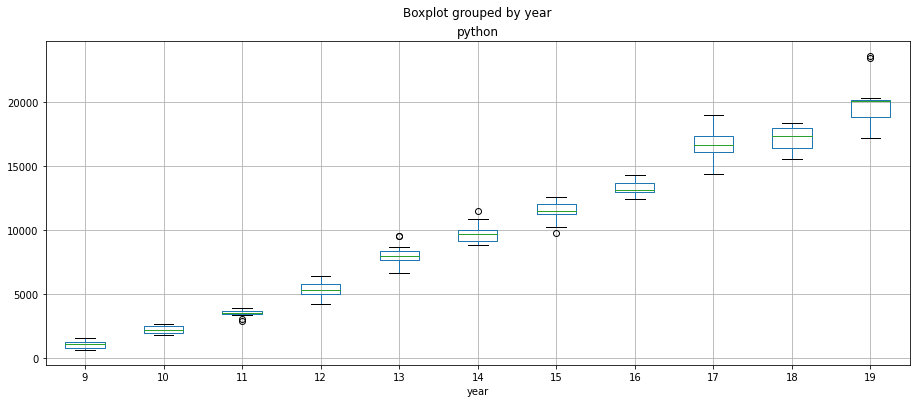

In [23]:
tria.boxplot(figsize=(15,6),by='year',column='python')

In [24]:
data_topics =  data.drop(columns=["month"])
print(data_topics.head())

   nltk  spacy  stanford-nlp  ...  OCR  Apache-spark-mlib  azure-virtual-machine
0     0      0             0  ...    5                  0                      0
1     1      0             0  ...   11                  0                      0
2     0      0             0  ...    2                  0                      0
3     0      0             0  ...    5                  0                      0
4     1      0             0  ...    3                  0                      0

[5 rows x 81 columns]


In [25]:
total= data_topics.sum(axis = 0)
top_tech = total.sort_values(ascending = False)[0:11]


In [26]:
top_tech

python          1301085.0
r                318365.0
python-3.x       195126.0
pandas           129399.0
matlab            86022.0
matlab.1          85972.0
Apache            83524.0
numpy             67875.0
apache-spark      54758.0
opencv            53019.0
tensorflow        47664.0
dtype: float64

In [27]:
top_tech_dataframe=pd.DataFrame(top_tech,columns=['Sum'])
top_tech_dataframe.style.background_gradient(cmap='PuBu', low=0, high=0, axis=0, subset=None)

,Sum
python,1301085.000000
r,318365.000000
python-3.x,195126.000000
pandas,129399.000000
matlab,86022.000000
matlab.1,85972.000000
Apache,83524.000000
numpy,67875.000000
apache-spark,54758.000000
opencv,53019.000000


In [28]:
fig = px.pie(top_tech_dataframe,values=top_tech_dataframe['Sum'],names=top_tech_dataframe.index,title='Top Tech')
fig.show()

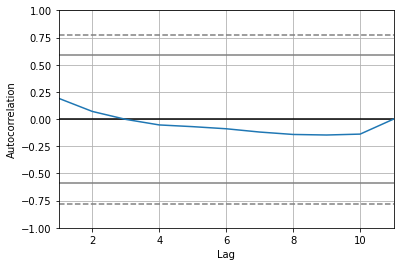

In [29]:
autocorrelation_plot(top_tech_dataframe)

In [31]:
data.index

RangeIndex(start=0, stop=132, step=1)

In [32]:
for i in data.index:
    data.loc[i,'year']=data['month'].str.split('-')[i][0]
    data.loc[i,'months']=data['month'].str.split('-')[i][1]
    

In [33]:
a = ['r', 'python']
fig = px.scatter_3d(data, x='year', y='months', z='numpy', color='year')
fig.show()

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=data['year'],
    y=data['python'],
    name='Python',
    marker_color='indianred'
))
fig.add_trace(go.Bar(
    x=data['year'],
    y=data['r'],
    name='r',
    marker_color='lightsalmon'
))
fig.add_trace(go.Bar(
    x=data['year'],
    y=data['pandas'],
    name='pandas',
    marker_color='green'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45)
fig.show()

In [35]:
fig = go.Figure(go.Bar(x=data['year'], y=data['python'], name='python'))
fig.add_trace(go.Bar(x=data['year'], y=data['machine-learning'], name='machine-learning'))
fig.add_trace(go.Bar(x=data['year'], y=data['r'], name='r'))

fig.update_layout(barmode='stack',xaxis_tickangle=-45)
fig.show()